In [133]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
import xgboost as xgb 
import missingno as msno
from tqdm import tqdm
!pip install eli5
import eli5

In [135]:
df=pd.read_hdf('train_property.h5')

In [136]:
df.shape

(45694, 35)

In [137]:
df['price'].describe()

count    45694.000000
mean        17.422577
std         38.332439
min          0.820018
25%          7.173917
50%          9.910000
75%         15.405717
max       3000.000015
Name: price, dtype: float64

<AxesSubplot:>

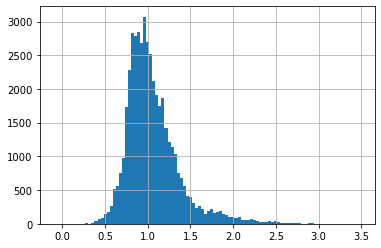

In [5]:
np.log10(df['price']).hist(bins=100)

In [6]:
df.sample(5)

,breadcrumbs,date,geo_block,owner,price,Security:,Building type:,Object type:,Ad type:,Commission agent:,...,Room type:,Internet:,Kitchen furniture:,TV:,Washing machine:,Foundation type:,Overlap type:,Type of the building:,Playground:,Class:
2214,"[Москва, МЦК Хорошёво, ул. Зорге]","[25 апреля, 5, (+1 за сегодня), Обновлено 16 мая]","[г. Москва, ул Зорге, г. Москва, ул Зорге]",[],11.39,NaN,Monolithic,Studio,from the developer,no fee,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25922,"[Москва, Новая Москва, п. Сосенское, п. Коммун...","[27 апреля, 7, (+1 за сегодня), Обновлено 17 мая]","[Новая Москва, п. Сосенское, п. Коммунарка, Но...","[Квартиры в ЖК ""Аквилон PARK""!]",6.95,provided,Monolithic,apartments,from the developer,no fee,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6049,"[Москва, МЦК Лужники]","[6 января, 16, (+2 за сегодня), Обновлено 17 мая]","[г. Москва, г. Москва]",[],13.99,NaN,Monolithic,apartments,from the developer,no fee,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39251,"[Москва, МЦК Шелепиха, ул. Сергея Макеева]","[11 октября 2018, 25, (+1 за сегодня), Обновле...","[г. Москва, ул Сергея Макеева, г. Москва, ул С...",[],145.00,provided,Monolithic,apartments,new building,no fee,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27520,"[Москва, МЦК Ростокино, пр-кт. Мира]","[4 марта, 4, (+2 за сегодня), Обновлено 18 мая]","[г. Москва, пр-кт Мира, г. Москва, пр-кт Мира]",[],17.32,provided,Monolithic,apartments,new building,no fee,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
# Miernik sukcesu
mean_price=df['price'].mean()
df['price_pred']=mean_price

mean_absolute_error(df['price'], df['price_pred'])

13.030922906892574

In [8]:
median_price=df['price'].median()
df['price_pred_median']=median_price

mean_absolute_error(df['price'], df['price_pred_median'])

10.33542636451175

In [9]:
X=df.values
y=df['price'].values

In [10]:

def run_model(model,X,y):
    model.fit(X,y)
    y_pred=model.predict(X)
    return mean_absolute_error(y, y_pred)


In [11]:
model=DummyRegressor(strategy='mean')
run_model(model,X,y)

13.030922906892457

In [12]:
model=DummyRegressor(strategy='median')
run_model(model,X,y)

10.33542636451175

<AxesSubplot:>

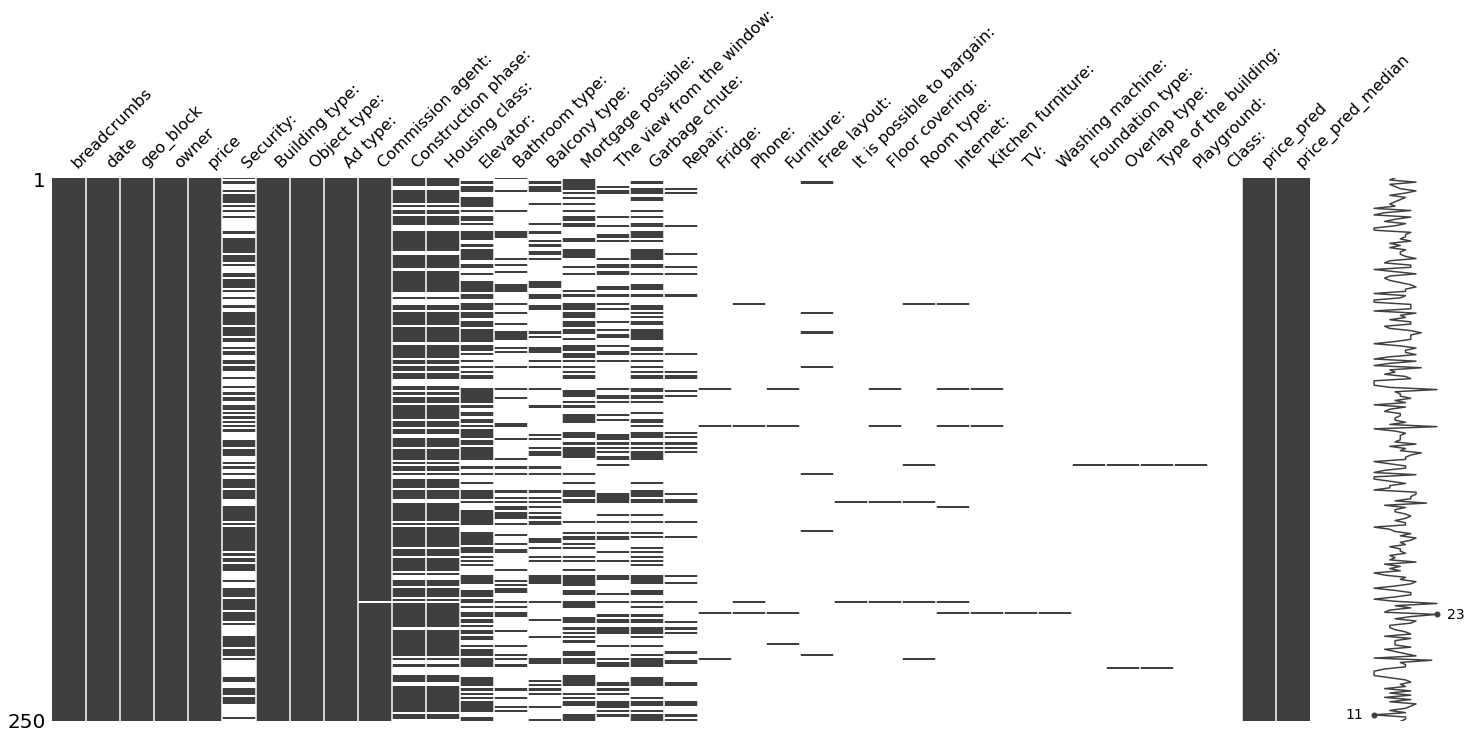

In [13]:
msno.matrix(df.sample(250))

<AxesSubplot:>

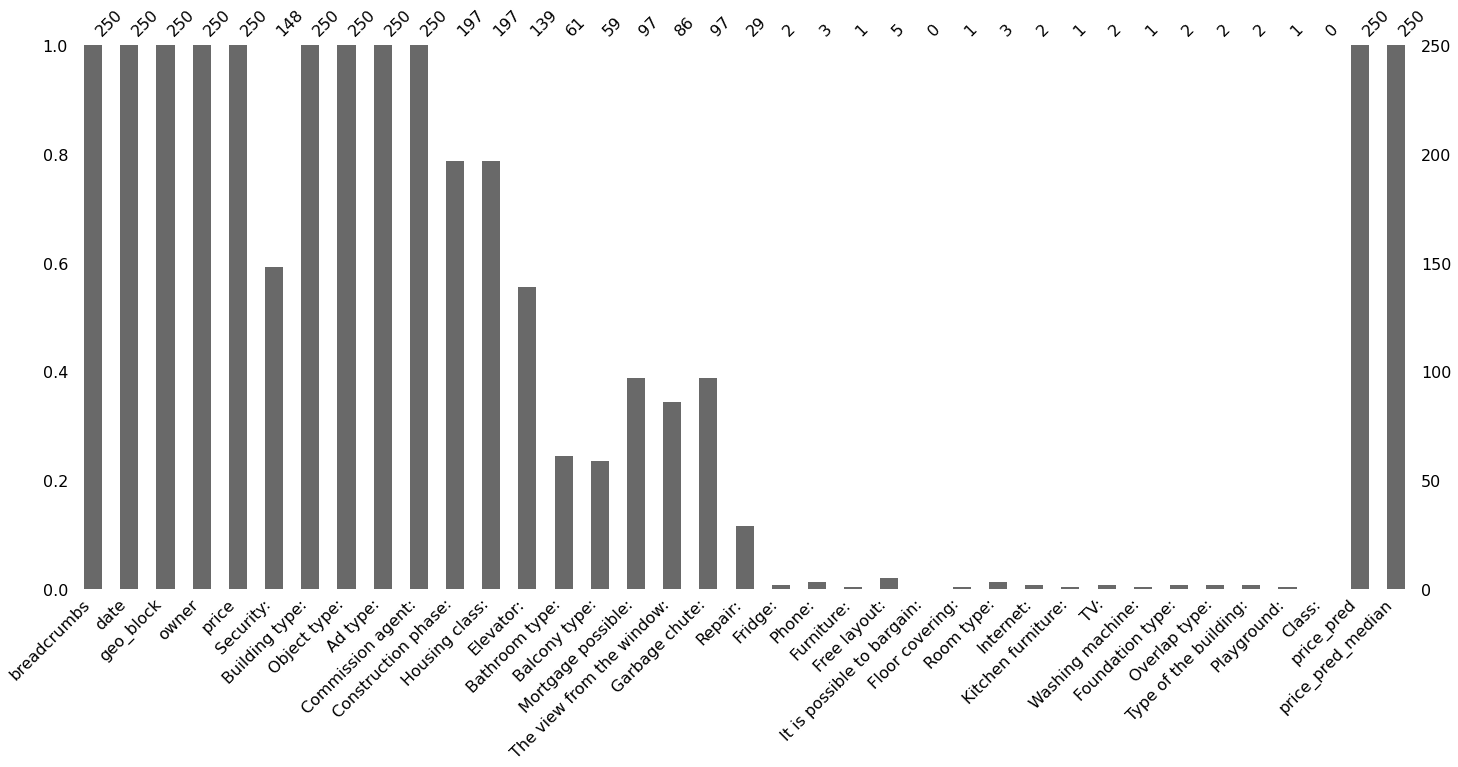

In [14]:
msno.bar(df.sample(250))

<AxesSubplot:>

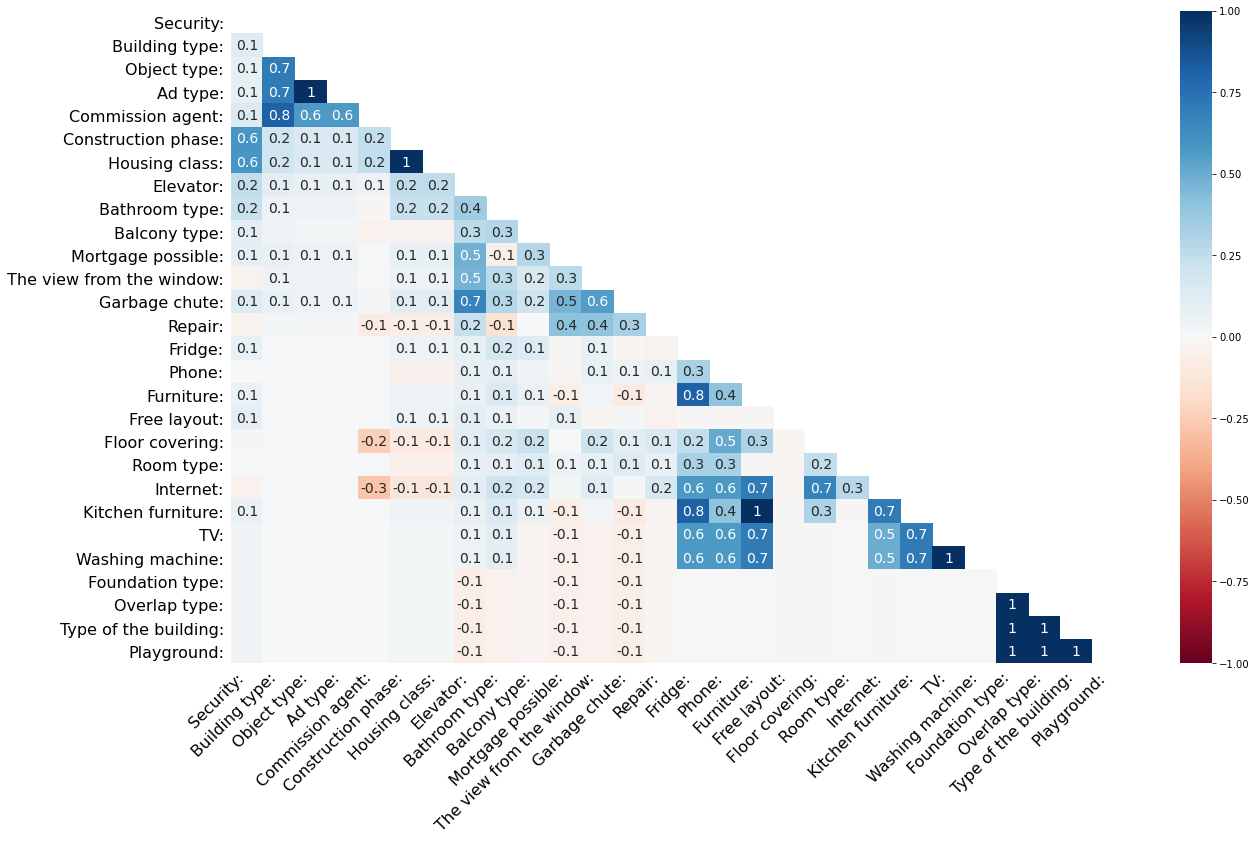

In [15]:
msno.heatmap((df.sample(250)))

In [139]:
df['Construction phase:'].value_counts()

Building walls    13760
Finish             7218
Commissioned       6239
Pit                3926
Playground         3658
Project             900
Is GK                67
Name: Construction phase:, dtype: int64

In [140]:
df['Construction phase:'].value_counts(normalize=True)

Building walls    0.384701
Finish            0.201800
Commissioned      0.174430
Pit               0.109763
Playground        0.102270
Project           0.025162
Is GK             0.001873
Name: Construction phase:, dtype: float64

In [141]:
constructiona_phase_dict = {val:idx for idx, val in enumerate(df['Construction phase:'].unique())}


In [142]:
df['Construction phase:'].head()

0      Commissioned
1    Building walls
2            Finish
3               NaN
4               NaN
Name: Construction phase:, dtype: object

In [104]:
df['Construction phase:'].head()#.map(constructiona_phase_dict)

0      Commissioned
1    Building walls
2            Finish
3               NaN
4               NaN
Name: Construction phase:, dtype: object

In [143]:
constructiona_phase_dict

{'Commissioned': 0,
 'Building walls': 1,
 'Finish': 2,
 nan: 3,
 'Playground': 4,
 'Pit': 5,
 'Project': 6,
 'Is GK': 7}

In [144]:
df['Construction phase:_cat']=df['Construction phase:'].factorize()[0]

In [145]:
df['Construction phase:_cat'].value_counts()

 1    13760
-1     9926
 2     7218
 0     6239
 4     3926
 3     3658
 5      900
 6       67
Name: Construction phase:_cat, dtype: int64

In [146]:
ids, labels =df['Construction phase:'].factorize()

In [147]:
df['Construction phase:_cat'] = df['Construction phase:'].factorize()[0]

In [148]:
df.columns

Index(['breadcrumbs', 'date', 'geo_block', 'owner', 'price', 'Security:',
       'Building type:', 'Object type:', 'Ad type:', 'Commission agent:',
       'Construction phase:', 'Housing class:', 'Elevator:', 'Bathroom type:',
       'Balcony type:', 'Mortgage possible:', 'The view from the window:',
       'Garbage chute:', 'Repair:', 'Fridge:', 'Phone:', 'Furniture:',
       'Free layout:', 'It is possible to bargain:', 'Floor covering:',
       'Room type:', 'Internet:', 'Kitchen furniture:', 'TV:',
       'Washing machine:', 'Foundation type:', 'Overlap type:',
       'Type of the building:', 'Playground:', 'Class:', 'price_pred',
       'Construction phase:_cat'],
      dtype='object')

In [149]:
cat_feats=[x for x in df.columns if ':' in x]

In [150]:
from tqdm import tqdm

In [167]:
for feat in tqdm(cat_feats):
    df['{}_cat'.format(feat)]= df[feat].factorize()[0]

100%|██████████| 31/31 [00:00<00:00, 175.14it/s]


In [125]:
df.sample(10)

,breadcrumbs,date,geo_block,owner,price,Security:,Building type:,Object type:,Ad type:,Commission agent:,...,Internet:_cat_cat,Kitchen furniture:_cat_cat,TV:_cat_cat,Washing machine:_cat_cat,Foundation type:_cat_cat,Overlap type:_cat_cat,Type of the building:_cat_cat,Playground:_cat_cat,Class:_cat_cat,Construction phase:_cat_cat_cat
2322,"[Москва, м. Новопеределкино, МЦК Кутузовская, ...","[15 мая, 6, (+1 за сегодня)]","[г. Москва, ул Скульптора Мухиной, г. Москва, ...",[],2.600000,NaN,Panel,Studio,secondary,no fee,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
8337,"[Москва, Ховрино, м. Ховрино, МЦК Коптево, ул....","[21 апреля, 2, (+1 за сегодня), Обновлено 16 мая]","[г. Москва, Ховрино, ул Дыбенко, г. Москва, Хо...",[],9.242530,NaN,Monolithic,flat,new building,no fee,...,1,1,1,1,1,1,1,1,1,1
24409,"[Москва, Кунцево, м. Молодежная, МЦК Стрешнево]","[2 апреля, 6, (+1 за сегодня), Обновлено 14 мая]","[г. Москва, Кунцево, г. Москва, Кунцево]",[],6.364600,provided,Panel,flat,new building,no fee,...,1,1,1,1,1,1,1,1,1,1
29689,"[Москва, МЦК Нижегородская]","[5 марта, 9, (+1 за сегодня), Обновлено 15 мая]","[г. Москва, г. Москва]",[],9.540000,provided,Monolithic,apartments,from the developer,no fee,...,2,2,2,2,2,2,2,2,2,2
7277,"[Москва, МЦК Владыкино, ш. Дмитровское]","[16 декабря 2018, 26, (+1 за сегодня), Обновле...","[г. Москва, ш Дмитровское, д. 1, к. 1, г. Моск...",[],19.260000,provided,Monolithic,apartments,from the developer,no fee,...,4,4,4,4,4,4,4,4,4,4
34667,"[Москва, Отрадное, м. Отрадное, МЦК Владыкино,...","[15 февраля 2018, 74, (+2 за сегодня), Обновле...","[г. Москва, Отрадное, ул Римского-Корсакова, г...",[],13.123984,NaN,Panel,flat,new building,no fee,...,1,1,1,1,1,1,1,1,1,1
26640,"[Москва, МЦК Деловой центр, пер. Богословский]","[2 марта, 8, (+1 за сегодня), Обновлено 15 мая]","[г. Москва, пер Богословский, г. Москва, пер Б...",[],253.110000,"Round-the-clock security system, checkpoint, v...",Monolithic-brick,apartments,new building,no fee,...,0,0,0,0,0,0,0,0,0,0
38772,"[Москва, МЦК Лихоборы]","[8 февраля, 11, (+1 за сегодня), Обновлено 15 ...","[г. Москва, г. Москва]",[],6.040000,provided,Monolithic,apartments,from the developer,no fee,...,3,3,3,3,3,3,3,3,3,3
25627,"[Москва, Красносельский, м. Красные ворота, МЦ...","[17 мая, 2, (+1 за сегодня)]","[г. Москва, Красносельский, г. Москва, Краснос...",[],16.805360,provided,Monolithic,flat,new building,no fee,...,0,0,0,0,0,0,0,0,0,0
42096,"[Москва, Хорошёво-Мнёвники, м. Шелепиха, МЦК Ш...","[14 мая, 6, (+1 за сегодня)]","[г. Москва, Хорошёво-Мнёвники, г. Москва, Хоро...",[],17.177000,provided,Monolithic-brick,flat,new building,no fee,...,1,1,1,1,1,1,1,1,1,1


In [168]:
num_feats=[x for x in df.columns if '_cat' in x]
len(num_feats)

31

In [169]:
X=df[num_feats].values
y=df['price'].values

In [170]:
model=xgb.XGBRegressor(max_depth=5, n_estimators=50, learning_rate=0.3, random_state=0)

In [171]:
model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [172]:
y_pred=model.predict(X)

In [173]:
mean_absolute_error(y,y_pred)

6.722959840681645

In [182]:

scores=cross_val_score(model, X,y,cv=3, scoring='neg_mean_squared_error')
np.mean(scores), np.std(scores)

(-846.8541352364064, 333.5920781743999)

In [175]:
import sklearn 
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

<AxesSubplot:>

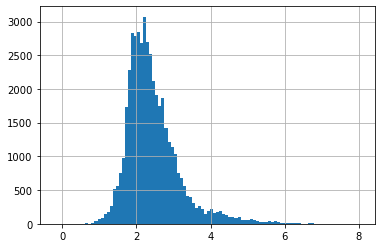

In [176]:
np.log(df['price']).hist(bins=100)

In [177]:
xgb_params=dict(max_depth=5, n_estimators=50, learning_rate=0.3, random_state=0)
model=xgb.XGBRegressor(**xgb_params)

In [178]:
y_log=np.log(y)

In [179]:
model.fit(X,y_log)
y_log_pred=model.predict(X)
y_pred=np.exp(y_log_pred)
mean_absolute_error(y,y_pred)

6.021261696597632

In [183]:
 eli5.show_weights(model, feature_names=num_feats,top=5)

In [184]:
pd.pivot_table(df, index=['Housing class:'], values=['price'], aggfunc=[np.mean,np.std, np.size, np.median])

,mean,std,size,median
,price,price,price,price
Housing class:,,,,
Business class,16.960212,14.529679,13265.0,13.870000
Comfort class,8.896281,4.088762,18592.0,8.220000
Economy class,9.014967,5.578974,1167.0,7.970000
Elite class,93.180874,111.694224,2744.0,59.735437


In [185]:
pd.pivot_table(df, index=['Construction phase:'], values=['price'], aggfunc=[np.mean,np.std, np.size, np.median])

,mean,std,size,median
,price,price,price,price
Construction phase:,,,,
Building walls,12.221877,12.691318,13760.0,9.394914
Commissioned,46.165452,81.743302,6239.0,19.050555
Finish,13.194237,21.964555,7218.0,8.900941
Is GK,15.900000,5.133008,67.0,15.660000
Pit,10.030942,4.398440,3926.0,9.001408
Playground,11.684227,8.752563,3658.0,10.500000
Project,24.403001,29.475173,900.0,16.616619


In [186]:
pd.pivot_table(df, index=['Construction phase:', 'Housing class:'], values=['price'], aggfunc=[np.mean,np.std, np.size, np.median])

mean         std    size     median
                                         price       price   price      price
Construction phase: Housing class:                                           
Building walls      Business class   15.807432    8.108724  3907.0  14.377584
                    Comfort class     8.956350    3.545199  9269.0   8.303165
                    Economy class     6.715802    2.104886   243.0   6.410000
                    Elite class      63.827085   47.811529   341.0  53.660000
Commissioned        Business class   22.969876   24.118084  3343.0  16.070000
                    Comfort class    11.818782    6.031318   562.0  10.730000
                    Economy class     9.968217    7.731570   497.0   8.160000
                    Elite class     108.678063  126.535385  1837.0  68.692320
Finish              Business class   15.338834    8.387727  2433.0  13.867500
                    Comfort class     7.934991    2.660985  4454.0   7.261194
                    Economy class     5.891495    2.108389    97.0   5.700000
                    Elite class      94.028601   83.129827   234.0  70.440000
Is GK               Business class   15.900000    5.133008    67.0  15.660000
Pit                 Business class   10.329118    4.524799  1842.0   9.025000
                    Comfort class     9.424779    3.806229  1984.0   8.845120
                    Elite class      16.564800    6.629807   100.0  16.155000
Playground          Business class   14.608252    5.473676  1181.0  13.790000
                    Comfort class     9.046278    3.277342  2060.0   8.964000
                    Economy class    10.190448    2.468527   330.0  10.131960
                    Elite class      40.119276   38.149889    87.0  23.600000
Project             Business class   23.914671   14.951960   492.0  20.400000
                    Comfort class    11.652283   17.472946   263.0  10.206881
                    Elite class      49.187118   56.478712   145.0  27.190000